# Analysis

This Jupyter notebook is the data analysis script to better study the cleaned up data from the Dyson Smell Station sensors.

This script requires the following packages:

In [85]:
import sys
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import config
import math
import datetime
from scipy import stats


### Loading Data

In [67]:
df = pd.read_csv("Export_Data/data.csv")
df_cleaned = pd.read_csv("Export_Data/cleanedData.csv")
df_analysis = pd.read_csv("Export_Data/analysisData.csv")
dailyH2S = pd.read_csv("Export_Data/dailyH2S.csv")

In [70]:
df = df.drop("Unnamed: 0", axis=1)
df_cleaned = df_cleaned.drop("Unnamed: 0", axis=1)
df_analysis = df_analysis.drop("Unnamed: 0", axis=1)

In [96]:
df_analysis.head()

,occupancy,bin1,bin2,H2S,temperature,humidity,time,date
0,1,71,47,22,62,14,09:00:00,2021-12-07
1,1,71,46,25,46,18,09:10:00,2021-12-07
2,2,72,49,23,28,18,09:20:00,2021-12-07
3,2,72,58,15,33,14,09:50:00,2021-12-07
4,5,74,47,12,35,11,10:00:00,2021-12-07


### Basic Analytics

Basic analytics to have a better idea of the parameters of the data. 

In [78]:
df_stats = pd.DataFrame(columns = ['Name', 'Mean', 'Median', 'Std', 'Variance', 'Min', 'Max', 'Range'])
df_cleaned_stats = pd.DataFrame(columns = ['Name', 'Mean', 'Median', 'Std', 'Variance', 'Min', 'Max', 'Range'])

In [79]:
def round(val):
    return round(val * 100) / 100

In [80]:
for _index, column in enumerate(df):
    if column == "timestamp" or column == "date" or column == "time":
        pass
    
    else:
        _current_column = df[column]
        df_stats.loc[_index] = [column, statistics.mean(_current_column),statistics.median(_current_column),statistics.stdev(_current_column), statistics.variance(_current_column),min(_current_column),max(_current_column),max(_current_column)-min(_current_column)]

        _current_column = df_cleaned[column]
        df_cleaned_stats.loc[_index] = [column, statistics.mean(_current_column),statistics.median(_current_column),statistics.stdev(_current_column), statistics.variance(_current_column),min(_current_column),max(_current_column),max(_current_column)-min(_current_column)]


In [81]:
df_stats

,Name,Mean,Median,Std,Variance,Min,Max,Range
0,occupancy,4.361375,0,6.539299,42.762431,-1,29,30
1,bin1,26.122334,29.49,10.907170,118.966352,-1.0,50.26,51.26
2,bin2,27.752809,29.88,15.334490,235.146579,-1.0,62.84,63.84
3,H2S,358.475494,-1,421.772292,177891.865980,-1,1515,1516
4,temperature,8.418727,-1.0,13.260281,175.835052,-1.0,29.8,30.8
5,humidity,6.183614,-1.0,10.496563,110.177828,-1.0,40.0,41.0


In [82]:
df_cleaned_stats

,Name,Mean,Median,Std,Variance,Min,Max,Range
0,occupancy,10.195373,9,6.336190,40.147298,0,29,29
1,bin1,48.740360,47.181287,17.768276,315.711648,0.0,100.0,100.0
2,bin2,43.817653,42.966264,19.595909,383.999650,0.0,100.0,100.0
3,H2S,72.189462,73.519914,8.958601,80.256536,0.0,100.0,100.0
4,temperature,51.888032,51.111111,17.553878,308.138634,0.0,100.0,100.0
5,humidity,75.768828,85.185185,16.811923,282.640750,0.0,100.0,100.0


### Initial Analysis

Plotting the different potential correlated data sources to visually study them. Basic correlation study. 

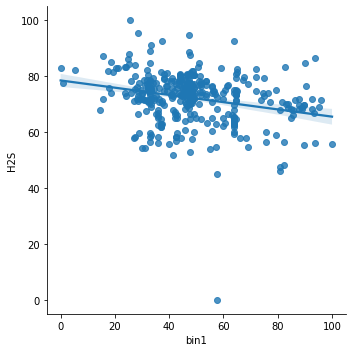

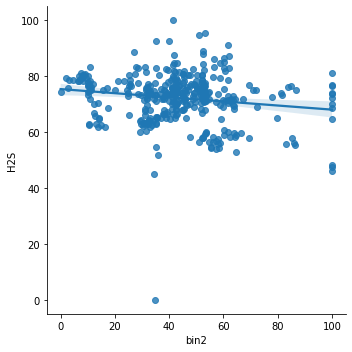

In [83]:
_fig = ["bin1","bin2"]

sns.lmplot(x=_fig[0], y='H2S', data=df_cleaned)
sns.lmplot(x=_fig[1], y='H2S', data=df_cleaned)


In [86]:
print("R-value bin1: " +  str(stats.pearsonr(df_analysis["bin1"], df_analysis["H2S"])[0] ** 2))
print("R-value bin2: " +  str(stats.pearsonr(df_analysis["bin2"], df_analysis["H2S"])[0] ** 2))

R-value bin1: 0.0383510992570385
R-value bin2: 0.02296174319223697


In [87]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

df_analysis.corr(method=histogram_intersection)


,occupancy,bin1,bin2,H2S,temperature,humidity
occupancy,1.0,3695.0,3697.0,3707.0,3704.0,3707.0
bin1,3695.0,1.0,12324.0,16591.0,14839.0,16083.0
bin2,3697.0,12324.0,1.0,14692.0,12468.0,14788.0
H2S,3707.0,16591.0,14692.0,1.0,18503.0,24080.0
temperature,3704.0,14839.0,12468.0,18503.0,1.0,17164.0
humidity,3707.0,16083.0,14788.0,24080.0,17164.0,1.0


In [88]:
df_analysis = df_analysis.reset_index()
df_analysis = df_analysis.drop("index",axis=1)

<AxesSubplot:>

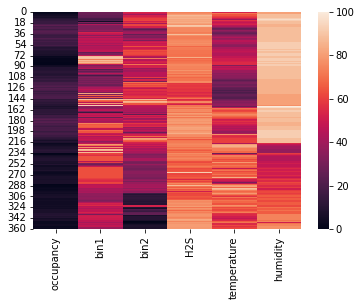

In [94]:
sns.heatmap(df_analysis)
# sns.heatmap(df_analysis[df_analysis["date"] == datetime.date(2021, 12, 9)].drop("date",axis=1))

<AxesSubplot:>

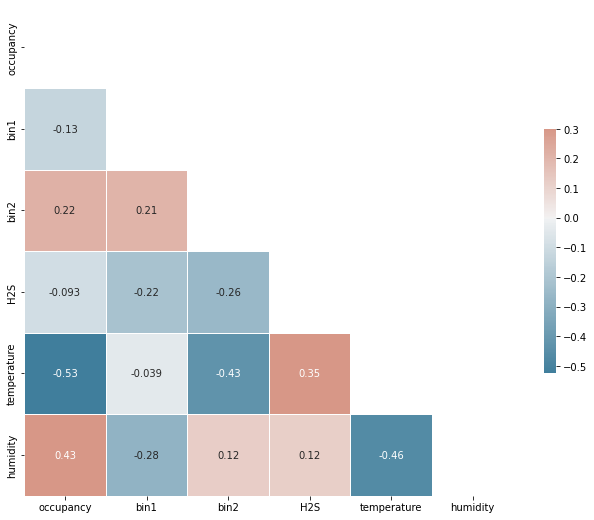

In [316]:

corr = df_analysis[(df_analysis["date"] != datetime.date(2021, 12, 11)) & (df_analysis["date"] != datetime.date(2021, 12, 14)) & (df_analysis["date"] != datetime.date(2021, 12, 15)) & (df_analysis["date"] != datetime.date(2021, 12, 13))].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

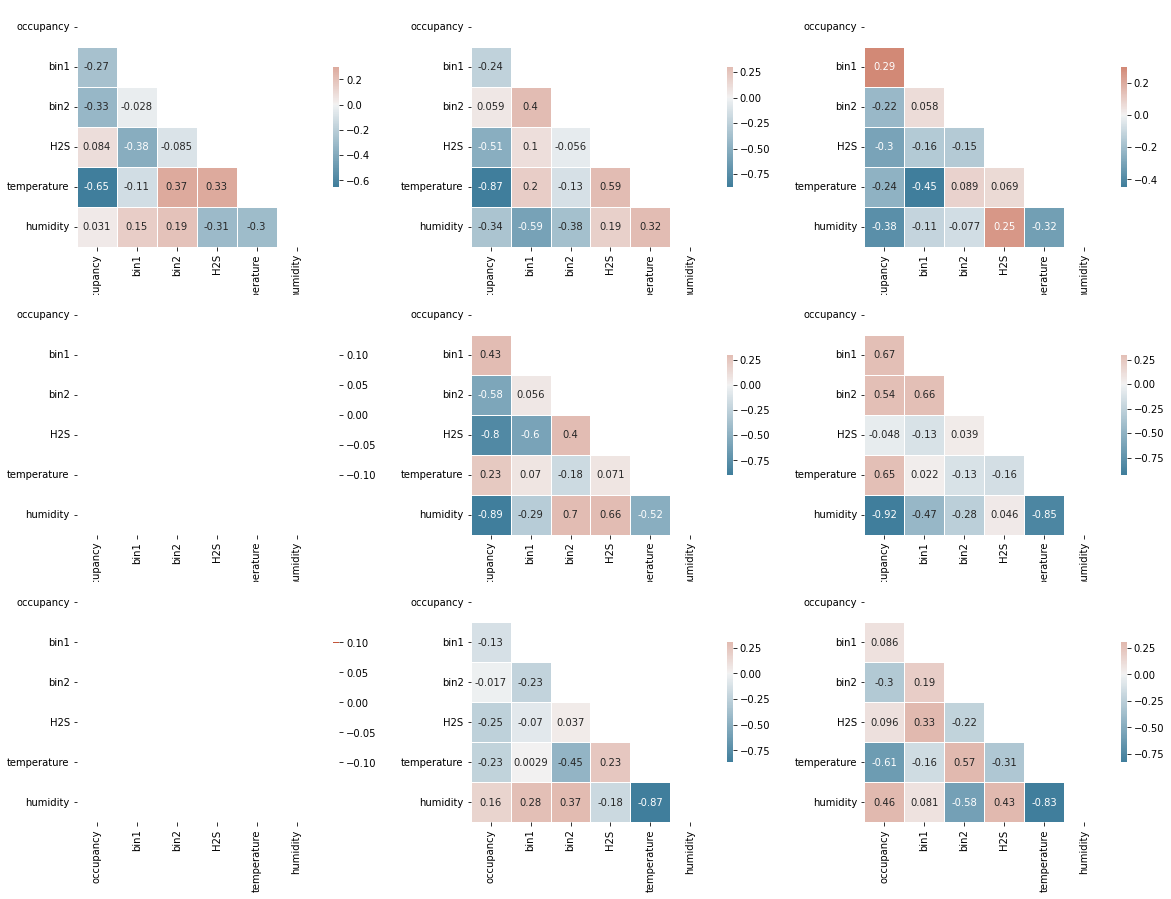

In [305]:

fig,axn = plt.subplots(3, 3, figsize=(20,15))

for index,ax in enumerate(axn.flat):
    # Compute the correlation matrix
    corr = df_analysis[df_analysis["date"] == datetime.date(2021, 12, 8+index)].drop("date",axis=1).corr()

    # Layout
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Peak Analysis

Analysing the peak values of the daily H2S reading to identify the time of the highest value.

In [107]:
dailyH2S = pd.read_csv("Export_Data/dailyH2S.csv")
dailyH2S = dailyH2S.drop("Unnamed: 0", axis=1)
dailyH2S["timestamp"] = dailyH2S["time"]
dailyH2S = dailyH2S.drop("time", axis=1)
dailyH2S.head()

,Dec08,Dec09,Dec10,Dec11,Dec12,Dec13,Dec14,Dec15,Dec16,hour_minute,timestamp
0,0.0,858.0,892.0,0.0,0.0,0.0,0.0,0.0,0.0,00:00:00,1.638922e+09
1,0.0,850.0,920.0,0.0,0.0,0.0,0.0,0.0,0.0,00:10:00,1.638922e+09
2,0.0,839.0,864.0,0.0,0.0,0.0,0.0,0.0,0.0,00:20:00,1.638923e+09
3,0.0,838.0,893.0,0.0,0.0,0.0,0.0,0.0,0.0,00:30:00,1.638923e+09
4,0.0,816.0,854.0,0.0,0.0,0.0,0.0,0.0,0.0,00:40:00,1.638924e+09


950.0
1023.0
935.0
884.0
910.0
1090.0
0.0
1515.0
1033.0


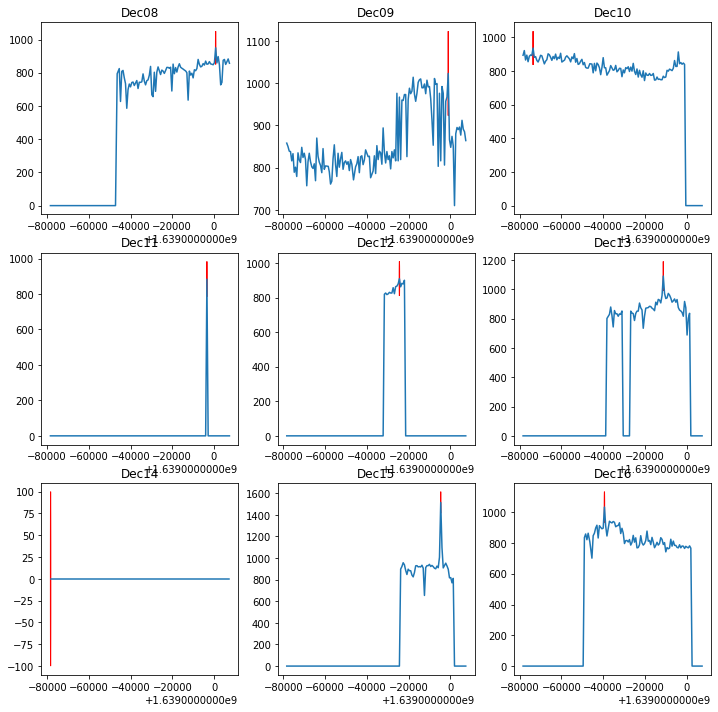

In [110]:
from datetime import datetime

largest_values = []

figure, axis = plt.subplots(3, 3,figsize=(12,12))

for _index, _column in enumerate(dailyH2S):
    if _column == "hour_minute" or _column == "timestamp":
        pass
    else:
        largest_values.append(dailyH2S[_column].idxmax())
        print(dailyH2S.loc[dailyH2S[_column].idxmax(),_column])
        axis[_index//3, _index%3].plot(dailyH2S["timestamp"], dailyH2S[_column])
        axis[_index//3, _index%3].set_title(_column)
        peak = plt.Circle((dailyH2S.loc[largest_values[_index], "timestamp"],dailyH2S.loc[largest_values[_index], _column]),100,color='r')
        axis[_index//3, _index%3].add_patch(peak)
        now = datetime.fromtimestamp(dailyH2S.loc[largest_values[_index], "timestamp"])


In [219]:
# largest_values
for _index, _column in enumerate(dailyH2S):
    print(largest_values[_index])
    print(dailyH2S.loc[largest_values[_index], "H2S"])

[129, 126, 9, 122, 87, 109, 0, 120, 63, 140]

In [65]:
df.describe

<bound method NDFrame.describe of       occupancy   bin1  bin2  H2S  temperature  humidity   timestamp  \
0             5  27.81   0.0  915         26.7      40.0  1638867600   
1             6  29.48   0.0  843         26.3      30.0  1638868200   
2             6  37.06   0.0  826         27.6      26.0  1638868800   
3             6  -1.00   0.0  837         28.0      25.0  1638869400   
4             6  -1.00   0.0  834         28.0      26.0  1638870000   
...         ...    ...   ...  ...          ...       ...         ...   
1362          0  33.63  -1.0   -1         -1.0      -1.0  1639725600   
1363          0  29.49  -1.0   -1         -1.0      -1.0  1639726200   
1364          0  29.49  -1.0   -1         -1.0      -1.0  1639726800   
1365          0  29.49  -1.0   -1         -1.0      -1.0  1639727400   
1366          0  29.49  -1.0   -1         -1.0      -1.0  1639728000   

            date      time  
0     2021-12-07  09:00:00  
1     2021-12-07  09:10:00  
2     2021-12-